<a href="https://colab.research.google.com/github/s-fereidooni/CSE151A_matchmaker/blob/main/151a_project_MS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install keras

In [3]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [4]:
!pip install scikeras

#Data Preprocessing
All columns that are not in the "d_[feature]" format are dropped from our dataframe. We then proceed to iterate through each column of our data. For each unique value in the column that is a string, we use regex to extract numeric values from the string, then convert these numeric strings to integers and calculates the mean of the resulting array of integers. Finally, we replace the original string value in the data frame with the calculated mean.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import keras_tuner
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('speeddating.csv')
df

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,b'',21.0,b'male',25.0,26.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',2.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'
8374,b'',21.0,b'male',25.0,24.0,1.0,b'[0-1]',b'European/Caucasian-American',b'Other',b'0',...,b'[0-3]',b'[3-5]',4.0,4.0,b'[0-5]',b'[0-4]',0.0,b'0',b'0',b'0'
8375,b'',21.0,b'male',25.0,29.0,4.0,b'[4-6]',b'European/Caucasian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,5.0,b'[6-8]',b'[5-6]',0.0,b'0',b'0',b'0'
8376,b'',21.0,b'male',25.0,22.0,3.0,b'[2-3]',b'European/Caucasian-American',b'Asian/Pacific Islander/Asian-American',b'0',...,b'[0-3]',b'[3-5]',5.0,5.0,b'[0-5]',b'[5-6]',0.0,b'0',b'1',b'0'


In [8]:
#Dropping irrelevant columns
dropCols = [col for col in df.columns if not col.startswith('d_')]
newDf = df.drop(columns = dropCols)

In [9]:
newDf

,d_age,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,...,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
0,6.0,b'[4-6]',b'[2-5]',b'[2-5]',b'[21-100]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
1,1.0,b'[0-1]',b'[2-5]',b'[2-5]',b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
2,1.0,b'[0-1]',b'[2-5]',b'[2-5]',b'[16-20]',b'[16-20]',b'[16-20]',b'[16-20]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[0-4]'
3,2.0,b'[2-3]',b'[2-5]',b'[2-5]',b'[21-100]',b'[0-15]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
4,3.0,b'[2-3]',b'[2-5]',b'[2-5]',b'[21-100]',b'[0-15]',b'[16-20]',b'[0-15]',b'[0-15]',b'[16-20]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0-0.33]',b'[0-4]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1.0,b'[0-1]',b'[0-1]',b'[0-1]',b'[0-15]',b'[0-15]',b'[21-100]',b'[16-20]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[5-6]'
8374,1.0,b'[0-1]',b'[0-1]',b'[0-1]',b'[21-100]',b'[16-20]',b'[0-15]',b'[0-15]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[0-4]'
8375,4.0,b'[4-6]',b'[0-1]',b'[0-1]',b'[21-100]',b'[0-15]',b'[21-100]',b'[0-15]',b'[0-15]',b'[0-15]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[-1-0]',b'[7-10]',b'[0-3]',b'[3-5]',b'[6-8]',b'[5-6]'
8376,3.0,b'[2-3]',b'[0-1]',b'[0-1]',b'[0-15]',b'[21-100]',b'[21-100]',b'[0-15]',b'[0-15]',b'[16-20]',...,b'[9-10]',b'[9-10]',b'[6-8]',b'[0-5]',b'[0.33-1]',b'[7-10]',b'[0-3]',b'[3-5]',b'[0-5]',b'[5-6]'


In [10]:
#Encoding columns to integer values (the average of the range)
for col in newDf:
  uniqueVals = newDf[col].unique()
  for uniqueVal in uniqueVals:
    if (isinstance(uniqueVal, str)):
      myStrs = re.findall('\d+', uniqueVal)
      myInts = np.array([int(myStr) for myStr in myStrs])
      avg = myInts.mean()
      newDf = newDf.replace(uniqueVal, avg)

In [11]:
newDf.columns

Index(['d_age', 'd_d_age', 'd_importance_same_race',
       'd_importance_same_religion', 'd_pref_o_attractive', 'd_pref_o_sincere',
       'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious',
       'd_pref_o_shared_interests', 'd_attractive_o', 'd_sinsere_o',
       'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o',
       'd_attractive_important', 'd_sincere_important',
       'd_intellicence_important', 'd_funny_important',
       'd_ambtition_important', 'd_shared_interests_important', 'd_attractive',
       'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
       'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner',
       'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
       'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums',
       'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv',
       'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping',
       'd_yoga', 

In [12]:
#Encoded dataframe
newDf = newDf.dropna(axis=1)
newDf

,d_age,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,...,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
0,6.0,5.0,3.5,3.5,60.5,18.0,18.0,18.0,7.5,7.5,...,9.5,9.5,7.0,2.5,11.000000,2.0,1.5,4.0,7.0,5.5
1,1.0,0.5,3.5,3.5,60.5,7.5,7.5,60.5,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,2.0,1.5,4.0,7.0,5.5
2,1.0,0.5,3.5,3.5,18.0,18.0,18.0,18.0,7.5,7.5,...,9.5,9.5,7.0,2.5,11.000000,2.0,1.5,4.0,7.0,2.0
3,2.0,2.5,3.5,3.5,60.5,7.5,7.5,60.5,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,2.0,1.5,4.0,7.0,5.5
4,3.0,2.5,3.5,3.5,60.5,7.5,18.0,7.5,7.5,18.0,...,9.5,9.5,7.0,2.5,11.000000,2.0,1.5,4.0,7.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1.0,0.5,0.5,0.5,7.5,7.5,60.5,18.0,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,8.5,1.5,4.0,2.5,5.5
8374,1.0,0.5,0.5,0.5,60.5,18.0,7.5,7.5,7.5,7.5,...,9.5,9.5,7.0,2.5,11.333333,8.5,1.5,4.0,2.5,2.0
8375,4.0,5.0,0.5,0.5,60.5,7.5,60.5,7.5,7.5,7.5,...,9.5,9.5,7.0,2.5,0.500000,8.5,1.5,4.0,7.0,5.5
8376,3.0,2.5,0.5,0.5,7.5,60.5,60.5,7.5,7.5,18.0,...,9.5,9.5,7.0,2.5,11.333333,8.5,1.5,4.0,2.5,5.5


In [13]:
y = df['match']
print(y)

0       b'0'
1       b'0'
2       b'1'
3       b'1'
4       b'1'
        ... 
8373    b'0'
8374    b'0'
8375    b'0'
8376    b'0'
8377    b'0'
Name: match, Length: 8378, dtype: object


In [14]:
X = newDf
y = df['match']
y = y.to_numpy()

In [15]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [16]:
#Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

# Building Our Model

We have a decision tree classifier with gini criterion and random splitting.  The classifier uses a depth of 5. To better our model, we use Grid Search to look for the optimal parameters. We also use Cost-complexity pruning to try and increase accuracy.


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, None],
    'min_samples_split': [2, 3, 4, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'criterion': ['entropy', 'gini']

}

dt = DecisionTreeClassifier()

# Instantiate the Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.8393955780278477


In [18]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

In [26]:
from sklearn.tree import DecisionTreeClassifier

# splitter random to choose the best random split at each node, allowing for a more generalizable model
# this is because it adds variability to the model and prevents the tree from being too complex and overfitting
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, min_samples_split=2, ccp_alpha=0.01)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy index: 0.8305


In [28]:
# Cost-complexity pruning
path = clf_entropy.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Find the optimal value for ccp_alpha
optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# Set the ccp_alpha parameter
clf_entropy.ccp_alpha = optimal_ccp_alpha

# Re-fit the tree
clf_entropy.fit(X_train, y_train)

print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy index: 0.8305


In [29]:
y_pred_train_entropy = clf_entropy.predict(X_train)
print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_entropy.score(X_test, y_test)))

Training set score: 0.8433
Test set score: 0.8455


[Text(0.47291666666666665, 0.9166666666666666, 'x[54] <= 4.75\nentropy = 0.658\nsamples = 5361\nvalue = [4448, 913]'),
 Text(0.2125, 0.75, 'x[30] <= 4.75\nentropy = 0.233\nsamples = 1868\nvalue = [1797, 71]'),
 Text(0.09166666666666666, 0.5833333333333334, 'x[55] <= 3.75\nentropy = 0.123\nsamples = 1253\nvalue = [1232, 21]'),
 Text(0.05, 0.4166666666666667, 'x[42] <= 8.25\nentropy = 0.08\nsamples = 808\nvalue = [800, 8]'),
 Text(0.03333333333333333, 0.25, 'x[2] <= 5.75\nentropy = 0.12\nsamples = 494\nvalue = [486, 8]'),
 Text(0.016666666666666666, 0.08333333333333333, 'entropy = 0.161\nsamples = 339\nvalue = [331, 8]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.0\nsamples = 155\nvalue = [155, 0]'),
 Text(0.06666666666666667, 0.25, 'entropy = 0.0\nsamples = 314\nvalue = [314, 0]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[18] <= 39.25\nentropy = 0.19\nsamples = 445\nvalue = [432, 13]'),
 Text(0.1, 0.25, 'x[15] <= 8.25\nentropy = 0.099\nsamples = 311\nvalue = [307, 4]'),
 Te

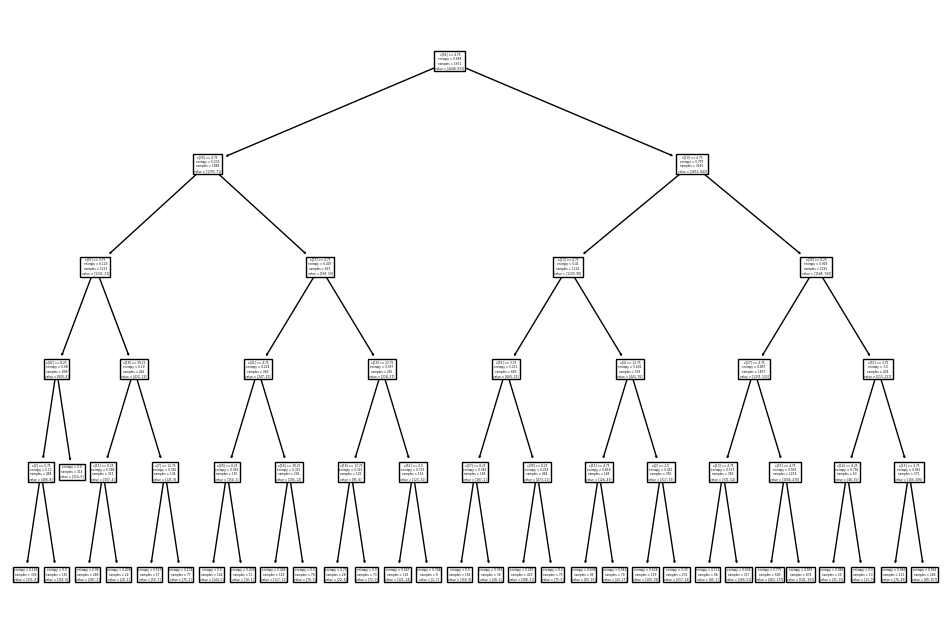

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_entropy.fit(X_train, y_train))

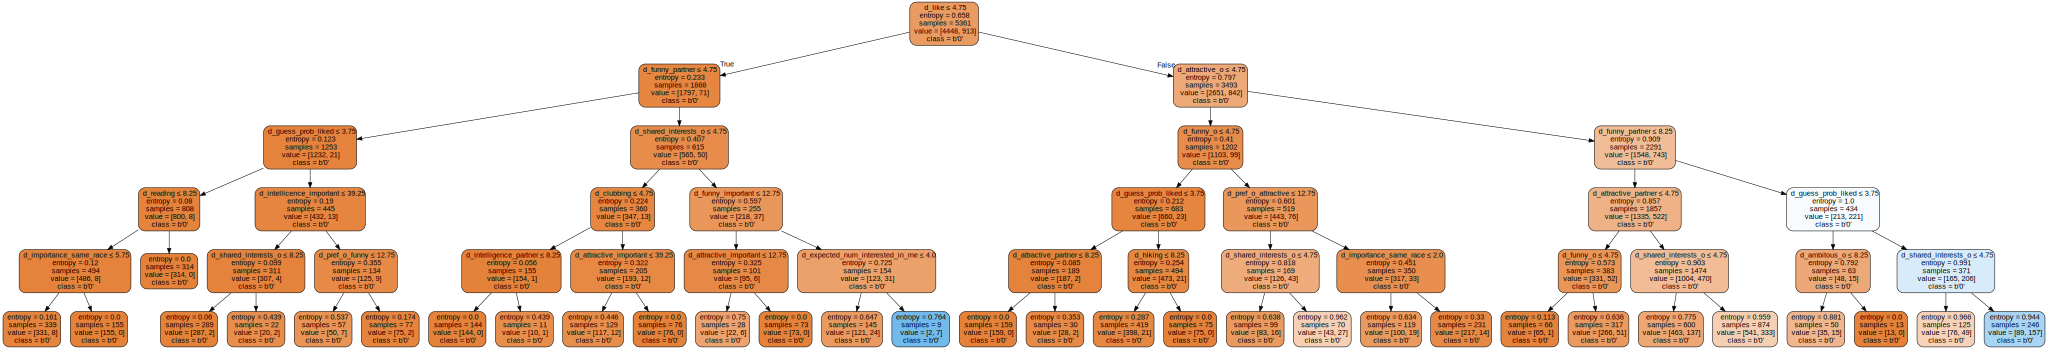

In [31]:
import graphviz
dot_data = tree.export_graphviz(clf_entropy, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [33]:
# Download Graph
# graph.render("decision_tree_diagram",format="png", view=False)

'decision_tree_diagram.png'

# Metrics

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

        b'0'       0.86      0.95      0.90      1407
        b'1'       0.44      0.19      0.26       269

    accuracy                           0.83      1676
   macro avg       0.65      0.57      0.58      1676
weighted avg       0.79      0.83      0.80      1676



In [ ]:
from sklearn.metrics import mean_squared_error
y_test_int = np.array([int(y.lstrip("b'").rstrip("'")) for y in y_test])
y_pred_int = np.array([int(y.lstrip("b'").rstrip("'")) for y in y_pred_entropy])
mse_test = mean_squared_error(y_test_int, y_pred_int)
print(mse_test)

0.16945107398568018


In [ ]:
y_train_int = np.array([int(y.lstrip("b'").rstrip("'")) for y in y_train])
y_pred_train_int = np.array([int(y.lstrip("b'").rstrip("'")) for y in y_pred_train_entropy])
mse_train = mean_squared_error(y_train_int, y_pred_train_int)
print(mse_train)

0.15668718522663683


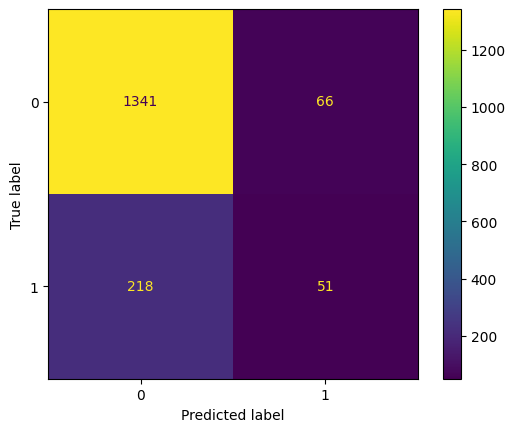

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()